In [2]:
%matplotlib inline
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from IPython.display import display
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from scipy.stats import uniform

In [3]:
#Read csv file and get the outputs(features) and inputs
features = ['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5', 'SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5', 'DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5']
inputs = ['S0', 'L', 'ms', 'mv']
error_features = ['SN112EK42.5_Error', 'SN112EK47.5_Error', 'SN112EK52.5_Error', 'SN112EK57.5_Error', 'SN112EK62.5_Error', 'SN112EK67.5_Error', 'SN112EK72.5_Error', 'SN112EK77.5_Error', 'SN112EK82.5_Error', 'SN112EK87.5_Error', 'SN124EK42.5_Error', 'SN124EK47.5_Error', 'SN124EK52.5_Error', 'SN124EK57.5_Error', 'SN124EK62.5_Error', 'SN124EK67.5_Error', 'SN124EK72.5_Error', 'SN124EK77.5_Error', 'SN124EK82.5_Error', 'SN124EK87.5_Error', 'DREK12.5_Error', 'DREK17.5_Error', 'DREK22.5_Error', 'DREK27.5_Error', 'DREK32.5_Error', 'DREK37.5_Error', 'DREK42.5_Error', 'DREK47.5_Error', 'DREK52.5_Error', 'DREK60.0_Error', 'DREK70.0_Error', 'DREK80.0_Error', 'DREK87.5_Error'
]
df = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=features)
df2 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=inputs)
df3 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_exp_result.csv", usecols=features)
df4 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_exp_result.csv", usecols=error_features)

In [4]:
y = df.loc[:, features].values
#scaling the data
#y_scaler = MinMaxScaler().fit_transform(y)
#y_scaler = Normalizer().fit_transform(y)
#y_scaler = RobustScaler().fit_transform(y)
#y_scaler = StandardScaler().fit_transform(y)
pd.DataFrame(data = y, columns = features).head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.049740,1.009370,0.971587,0.933543,0.895236,0.860123,0.828202,0.797841,0.769038,0.742806,...,1.25778,1.28492,1.31206,1.33919,1.36544,1.39081,1.42918,1.47076,1.50127,1.51709
1,1.101460,1.076550,1.053560,1.032650,1.013830,0.995491,0.977648,0.959740,0.941767,0.928342,...,1.23401,1.26444,1.29513,1.32608,1.36158,1.40161,1.45320,1.51812,1.59659,1.65511
2,1.033870,0.999617,0.967117,0.937034,0.909368,0.884840,0.863449,0.842654,0.822455,0.805631,...,1.25178,1.27908,1.30598,1.33249,1.36163,1.39341,1.43365,1.48005,1.51807,1.54192
3,0.979704,0.948603,0.921646,0.900123,0.884032,0.867298,0.849921,0.837539,0.830154,0.821927,...,1.23993,1.26528,1.29176,1.31937,1.34603,1.37173,1.40500,1.44910,1.48531,1.50366
4,1.026250,0.998031,0.974097,0.951106,0.929057,0.908939,0.890750,0.876159,0.865163,0.855486,...,1.21375,1.23669,1.26262,1.29155,1.32245,1.35531,1.40611,1.47931,1.54623,1.59240


In [5]:
#applying PCA on the outputs and reducing it from 33D to 3D
pca = PCA(n_components=3)
yPCA = pca.fit_transform(y)
PCADf = pd.DataFrame(data = yPCA, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
PCADf.head()


,PCA 1,PCA 2,PCA 3
0,0.004585,0.189818,-0.017025
1,-0.889633,0.023971,0.013887
2,-0.174100,0.061279,-0.026724
3,-0.011284,-0.096832,-0.013462
4,-0.320008,-0.111562,0.062695


In [5]:
#Seeing how much each PCA takes into account
print(pca.explained_variance_ratio_) #it seems like the 3PCA account for 98% of the data

[0.95664316 0.03929512 0.00237127]


In [6]:
#testing if the reverse pca works
G = np.dot(yPCA, pca.components_) + pca.mean_
print(G)

[[1.05226638 1.00984326 0.96921742 ... 1.46182261 1.48709511 1.50213919]
 [1.10304362 1.0782522  1.05524568 ... 1.52386133 1.59330332 1.64266425]
 [1.03278436 0.99840936 0.96670162 ... 1.47629668 1.51377543 1.53713317]
 ...
 [0.95791579 0.90589328 0.85745636 ... 1.38459667 1.38846038 1.38896563]
 [1.01619208 0.95436387 0.89447893 ... 1.3714765  1.37153888 1.37266782]
 [0.99489351 0.96558251 0.94040069 ... 1.45655175 1.51113185 1.55003265]]


In [7]:
#extracting and looking at the inputs
x = df2.loc[:, inputs].values
xdf = pd.DataFrame(data = x, columns = ['S0', 'L', 'ms', 'mv'])
xdf.head()

,S0,L,ms,mv
0,31.159,43.5,0.980,0.865000
1,35.073,56.1,0.700,0.875000
2,32.395,66.9,0.860,0.855000
3,28.275,86.7,0.972,1.095001
4,27.657,79.5,0.612,0.975000


In [8]:
#using sckitlearn to do the gaussian process
kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(x, yPCA)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1), n_restarts_optimizer=10,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

In [9]:
#creating new randomized inputs x_ similar to x
msv_min = min(x[:,2].min(),x[:,3].min())
msv_max = max(x[:,2].max(),x[:,3].max())
sl_min = min(x[:,0].min(),x[:,1].min())
sl_max = max(x[:,0].max(),x[:,1].max())
x_sl = np.random.uniform(sl_min,sl_max,94)
x_msv = np.random.uniform(msv_min,msv_max,94)
x_sl = x_sl.reshape(47,2)
x_msv = x_msv.reshape(47,2)
x_ = np.concatenate((x_sl,x_msv),axis=1)
x_df = pd.DataFrame(data = x_, columns =  ['S0', 'L', 'ms', 'mv'])
x_df.head()

,S0,L,ms,mv
0,67.435407,96.000057,1.060497,0.897444
1,52.220715,40.647893,0.619497,0.998561
2,112.420615,80.647919,0.754445,0.877165
3,111.576292,93.796187,0.954161,0.648290
4,102.520674,56.963868,0.880245,1.001980


In [10]:
#using the gp model trained on the inputs(x) and the outputs(y) on x_ to predict y_pred and y_std
y_pred, y_std = gp.predict(x_, return_std=True)
#y_pred, y_cov= gp.predict(x_, return_cov=True) #should I inverse pca on y_cov?
y_preddf = pd.DataFrame(data = y_pred, columns =  ['PCA 1', 'PCA 2', 'PCA 3'])
y_preddf.head()
print(y_std.shape)
print(y_pred.shape)

(47,)
(47, 3)


In [11]:
#Reverse PCA on y_pred to look like y
Y = np.dot(y_pred, pca.components_) + pca.mean_
Ydf= pd.DataFrame(data = Y, columns =  features)
Ydf.head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
1,1.007240,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
2,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
3,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
4,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706


In [12]:
#obtaiting the covariance from y_pred, however this is incorrect
Ycov = Ydf.cov()
Ycovdf = pd.DataFrame(data= Ycov)
Ycovdf.head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
SN112EK42.5,0.000313,0.000341,0.000364,0.000384,0.000400,0.000414,0.000428,0.000439,0.000448,0.000458,...,-0.000031,-0.000027,-0.000015,0.000005,0.000031,0.000063,0.000118,0.000197,0.000295,0.000373
SN112EK47.5,0.000341,0.000381,0.000415,0.000446,0.000472,0.000497,0.000520,0.000541,0.000559,0.000578,...,-0.000037,-0.000030,-0.000014,0.000010,0.000042,0.000082,0.000147,0.000245,0.000364,0.000458
SN112EK52.5,0.000364,0.000415,0.000461,0.000502,0.000539,0.000575,0.000608,0.000639,0.000666,0.000693,...,-0.000042,-0.000033,-0.000013,0.000015,0.000053,0.000100,0.000175,0.000291,0.000431,0.000538
SN112EK57.5,0.000384,0.000446,0.000502,0.000554,0.000602,0.000647,0.000691,0.000731,0.000766,0.000802,...,-0.000048,-0.000035,-0.000012,0.000020,0.000063,0.000117,0.000202,0.000334,0.000493,0.000613
SN112EK62.5,0.000400,0.000472,0.000539,0.000602,0.000659,0.000715,0.000768,0.000817,0.000861,0.000905,...,-0.000052,-0.000037,-0.000011,0.000025,0.000073,0.000133,0.000227,0.000374,0.000552,0.000684


 C:\Users\danny\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


ValueError: operands could not be broadcast together with shapes (33,47) (33,) 

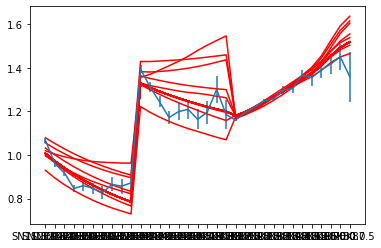

In [13]:
#plotting the y_predict based on energy E_c.m. for example the column SN112EK42.5 represent energy 42.5 
Yy = np.array([Y[:,0],Y[:,1],Y[:,2],Y[:,3],Y[:,4],Y[:,5],Y[:,6],Y[:,7],Y[:,8],Y[:,9],Y[:,10],Y[:,11],Y[:,12],Y[:,13],Y[:,14],Y[:,15],Y[:,16],Y[:,17],Y[:,18],Y[:,19],Y[:,20],Y[:,21],Y[:,22],Y[:,23],Y[:,24],Y[:,25],Y[:,26],Y[:,27],Y[:,28],Y[:,29],Y[:,30],Y[:,31],Y[:,32]])
y_ex_std =df4.loc[:,error_features].values
y_ex_std = y_ex_std.reshape(33,1)
Y_ex = df3.loc[:, features].values
Y_ex = Y_ex.reshape(33,1)
plt.plot(features,Yy, 'r')
plt.errorbar(features,Y_ex, yerr = y_ex_std)
plt.fill(features, Yy - np.sqrt(np.diag(Ycov)), Yy + np.sqrt(np.diag(Ycov)), alpha=0.5, color='k')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')

$Like = exp(-\sum \frac{(y(x) - y_{exp})^2}{2\sigma^2})$ 

$like = e^{-(y(x)-y_{exp})(YcovM)(y(x)-y_{exp}).T}$

$YcovM = Ycov - Y_{experror}I$

(47,)


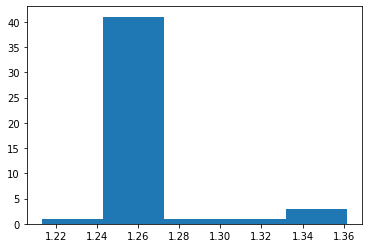

In [74]:
#creating the likelihood function
Y_exp = df3.loc[:, features].values
y_exp_std =df4.loc[:,error_features].values
covM = Ycov - y_exp_std*np.eye(33)
Z = Y-Y_exp
H = np.dot(Z,covM) #matmul?
J = np.dot(H,Z.T) #J = (Y-Y_exp)*covM*(Y-Y_exp).T, Should be inverse covM
like = np.exp(-sum(J))
#like = np.exp(-sum(((Y-Y_exp)**2)/(2*y_exp_std**2)))
plt.hist(like,5)
print(like.shape)

$Posterior = \frac{Like*S0*L*ms*mv}{\sum(like*(S0+L+ms+mv)}
\\
\\
posterior \propto Like*S0*L*ms*mv$

In [87]:
N = 10000 #number of iterations

#size of the steps
met_step = 1
met_step2 = 0.05
met_step3 = 0.01
met_accept = 0

#empty arrays to store the data from the mcmc
S0 = np.zeros(N)
L = np.zeros(N)
ms = np.zeros(N)
mv = np.zeros(N)
lik = np.zeros(N)
mu = np.zeros(N)

#this is the likelihood function that I derived in the above line
data = like

#starting points
S0[0] = 30
L[0] = 70
mu[0] = 0.8
lik[0] = 0.9
mv[0] = 1

#Here is the random walk
for i in range(N-1):
    if np.random.rand() > 0.5:
        S0_c = S0[i] + uniform(0,met_step).rvs()
        L_c = L[i] + uniform(0,met_step).rvs()
        mv_c = mv[i] + uniform(0,met_step2).rvs()
    else:
        S0_c = S0[i] - uniform(0,met_step).rvs()
        L_c = L[i] - uniform(0,met_step).rvs()
        mv_c = mv[i] - uniform(0,met_step2).rvs()
       
    mu_c = norm(mu[i],met_step3).rvs()    
    ms_i = norm(0.7, 0.05).pdf(mu[i])
    ms_c = norm(0.7, 0.05).pdf(mu_c)
    lik_i = norm(mu[i],1.4).pdf(data).prod()
    lik_c = norm(mu_c,1.4).pdf(data).prod()
    
    #Here we have set up the parameter range
    constraints = [0.6<=ms_c<=1,
                 0.6<mv_c<1.2,
                 25.7<S0_c<36,
                 32<=L_c<=120]
    if all(constraints):
        #the metroplois ratio
        met_r = lik_c*S0_c*L_c*ms_c*mv_c/lik_i*S0[i]*L[i]*ms_i*mv[i]
        if np.random.rand() < min(1,met_r):
            S0[i+1] = S0_c
            L[i+1] = L_c
            mu[i+1] = mu_c
            mv[i+1] = mv_c
            ms[i] = ms_c
            lik[i] = lik_c
            met_accept = met_accept +1
        else:
            S0[i+1] = S0[i]
            L[i+1] = L[i]
            mu[i+1] = mu[i]
            mv[i+1] = mv[i]
            ms[i] = ms_i
            lik[i] = lik_i
    else:
        S0[i+1] = S0[i]
        L[i+1] = L[i]
        mu[i+1] = mu[i]
        mv[i+1] = mv[i]
        ms[i] = ms_i
        lik[i] = lik_i
        
        
M = met_accept/N
print(M)

0.387185


In [8]:
#Using the MCMC sampling figure 2 can be created using the plots below
#plt.hist(S0,30, range = (10,40))
#plt.hist(L,30, range=(30,120))
#plt.hist(ms,30,range =(0.6,1))
#plt.hist(mv,100, range = (0.6,1.2))
#plt.hist2d(ms,mv)
#plt.hist2d(ms,L)
#plt.hist2d(ms,S0)
#plt.hist2d(mv,ms)
#plt.hist2d(mv,L)
#plt.hist2d(mv,S0)
#plt.hist2d(L,ms)
#plt.hist2d(L,mv)
#plt.hist2d(L,S0)
#plt.hist2d(S0,mv)
#plt.hist2d(S0,L)
#plt.hist2d(S0,ms)

 C:\Users\danny\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:divide by zero encountered in true_divide


inf


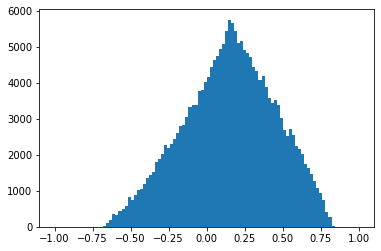

In [105]:
#using the ms and mv sampling from mcmc, figure 3 can be created
fI = 1/ms - 1/mv
plt.hist(fI, 100, range=(-1,1))
print(fI.mean())

In [97]:
#reshaping the sampling from mcmc to look like the inputs
S0 = S0.reshape(N,1)
L = L.reshape(N,1)
ms = ms.reshape(N,1)
mv = mv.reshape(N,1)
SL = np.concatenate((S0,L),axis=1)
msv = np.concatenate((ms,mv),axis=1)
x_mcmc = np.concatenate((SL,msv),axis=1)
x_MCMC = pd.DataFrame(data = x_mcmc, columns =  ['S0', 'L', 'ms', 'mv'])
x_MCMC.head()

,S0,L,ms,mv
0,30.000000,70.000000,1.079819,1.000000
1,30.000000,70.000000,0.684094,1.000000
2,30.788374,70.141137,0.737421,1.023541
3,31.319453,70.521572,0.737421,1.026640
4,31.319453,70.521572,0.737421,1.026640


In [ ]:
#using the trained gaussian process to predict a new y based on the mcmc sampling. This new y will be the posterior
y_mcmc = gp.predict(x_mcmc, return_std=True)
#Reverse PCA on y_mcmc to look like y
Y_mcmc = np.dot(y_mcmc, pca.components_) + pca.mean_
Y_mcmcdf= pd.DataFrame(data = Y_mcmc, columns =  features)
Y_mcmcdf.head()

In [ ]:
#posterior mean
Y_mcmc_mean = Y_mcmcdf[features].mean()

In [ ]:
#here figure 1 is created
#plotting the Y_mcmc based on energy E_c.m. for example the column SN112EK42.5 represent energy 42.5 
Yy_mcmc = np.array([Y_mcmc[:,0],Y_mcmc[:,1],Y_mcmc[:,2],Y_mcmc[:,3],Y_mcmc[:,4],Y_mcmc[:,5],Y_mcmc[:,6],Y_mcmc[:,7],Y_mcmc[:,8],Y_mcmc[:,9],Y_mcmc[:,10],Y_mcmc[:,11],Y_mcmc[:,12],Y_mcmc[:,13],Y_mcmc[:,14],Y_mcmc[:,15],Y_mcmc[:,16],Y_mcmc[:,17],Y_mcmc[:,18],Y_mcmc[:,19],Y_mcmc[:,20],Y_mcmc[:,21],Y_mcmc[:,22],Y_mcmc[:,23],Y_mcmc[:,24],Y_mcmc[:,25],Y_mcmc[:,26],Y_mcmc[:,27],Y_mcmc[:,28],Y_mcmc[:,29],Y_mcmc[:,30],Y_mcmc[:,31],Y_mcmc[:,32]])
plt.plot(features,Yy_mcmc, 'g')
plt.plot(features, Y_mcmc_mean, 'k')
plt.plot(features,Yy, 'r')
plt.errorbar(features,Y_ex, yerr = y_ex_std)
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')